In [1]:
# Feature Extraction & Vectorization

import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.sparse


In [2]:
#  Charger le dataset nettoyé
df = pd.read_csv('cleaned_hotel_reviews.csv')
print("Dataset chargé :", df.shape)
print(df.head())

Dataset chargé : (201, 1)
                                      processed_text
0  ['hôtel', 'exceptionnel', 'cœur', 'tun', 'reco...
1  ['bonjour', 'écris', 'fair', 'part', 'immens',...
2  ['vérit', 'hont', 'l’hôteller', 'tunisien', 'c...
3  ['excellent', 'séjour', 'business', 'hôtel', '...
4  ['tres', 'bon', 'hôtel', 'tres', 'propr', 'ser...


In [9]:
# Préparer le texte pour vectorizers

# Réutiliser la fonction process_review 
from text_utils import process_review

# Convertir processed_text en string pour CountVectorizer
texts = df['processed_text'].apply(lambda x: ' '.join(eval(x))).astype(str)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# Convertir processed_text en string
texts = df['processed_text'].apply(lambda x: ' '.join(eval(x))).astype(str)

In [5]:
# Bag-of-Words
count_vect = CountVectorizer(analyzer=process_review)
X_bow = count_vect.fit_transform(texts)

print("Bag-of-Words shape:", X_bow.shape)
print("Taille vocabulaire BOW :", len(count_vect.get_feature_names_out()))
print("20 premiers mots du vocabulaire BOW :", list(count_vect.vocabulary_.keys())[:20])
print("Vecteur BOW exemple (document 0) :", X_bow[0].toarray())


Bag-of-Words shape: (201, 1005)
Taille vocabulaire BOW : 1005
20 premiers mots du vocabulaire BOW : ['hôtel', 'exceptionnel', 'cœur', 'tun', 'recommand', 'viv', 'tout', 'person', 'passag', 'mission', 'centr', 'personnel', 'd’un', 'grand', 'gentilless', 'tre', 'professionnel', 'immen', 'merc', 'récept']
Vecteur BOW exemple (document 0) : [[0 0 0 ... 0 0 0]]


In [6]:

#  TF-IDF
tfidf_vect = TfidfVectorizer(analyzer=process_review)
X_tfidf = tfidf_vect.fit_transform(texts)

print("TF-IDF shape:", X_tfidf.shape)
print("Vecteur TF-IDF exemple (document 0) :", X_tfidf[0].toarray())


TF-IDF shape: (201, 1005)
Vecteur TF-IDF exemple (document 0) : [[0. 0. 0. ... 0. 0. 0.]]


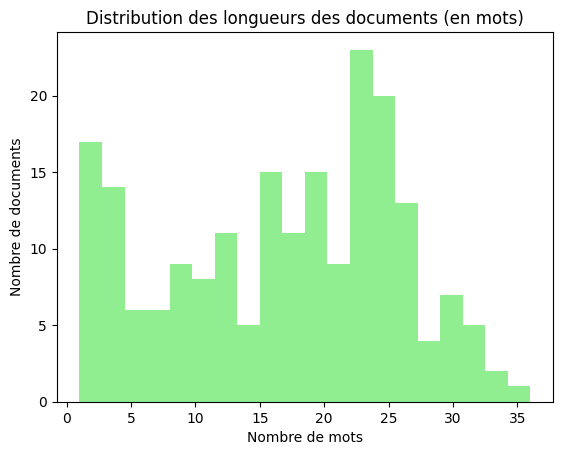

In [8]:
# Visualisation rapide : documents les plus longs (en mots)
doc_lengths = [len(doc.split()) for doc in texts]
plt.hist(doc_lengths, bins=20, color='lightgreen')
plt.title('Distribution des longueurs des documents (en mots)')
plt.xlabel('Nombre de mots')
plt.ylabel('Nombre de documents')
plt.show()

## Explications:

CountVectorizer : transforme les textes en Bag-of-Words (compte des occurrences de chaque mot).

TfidfVectorizer : transforme les textes en TF-IDF, qui pondère les mots selon leur importance dans le corpus.

CountVectorizer et TfidfVectorizer attendent des chaînes de caractères, pas des listes de tokens. Donc on convertit processed_text en chaînes

Chaque liste de tokens devient une phrase séparée par espaces.

Exemple : ['hotel', 'excel', 'personnel'] → "hotel excel personnel"

fit_transform construit le vocabulaire et transforme les textes en vecteurs.

Chaque vecteur a la longueur du vocabulaire, avec des 1/2/… selon le nombre d’occurrences du mot.

TF-IDF:
Le TF-IDF pondère les mots rares plus fortement et réduit l’importance des mots très fréquents.

Pratique pour ML car ça réduit le bruit et rend le modèle plus précis.


Points clés à retenir

La colonne processed_text contient déjà les tokens stemmés et nettoyés.

On transforme ces tokens en chaînes pour les vectorizers.

CountVectorizer → Bag-of-Words, compte simple des mots.

TfidfVectorizer → TF-IDF, pondération des mots selon leur importance.

On peut inspecter un vecteur pour comprendre la représentation.



In [22]:

#  Visualisation : mots les plus fréquents
from collections import Counter
all_words = [word for tokens in df['processed_text'] for word in eval(tokens)]
most_common = Counter(all_words).most_common(20)
print("20 mots les plus fréquents :", most_common)

20 mots les plus fréquents : [('tres', 121), ('hôtel', 93), ('…', 77), ('personnel', 66), ('chambr', 66), ('servic', 45), ('propr', 42), ('bon', 39), ('cet', 37), ('accueil', 34), ('a', 33), ('excellent', 32), ('jai', 31), ('lhôtel', 31), ('tout', 29), ('nuit', 28), ('bien', 27), ('pass', 26), ('cest', 26), ('chaleur', 24)]


C:\Users\user\AppData\Local\Temp\ipykernel_26176\632993736.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


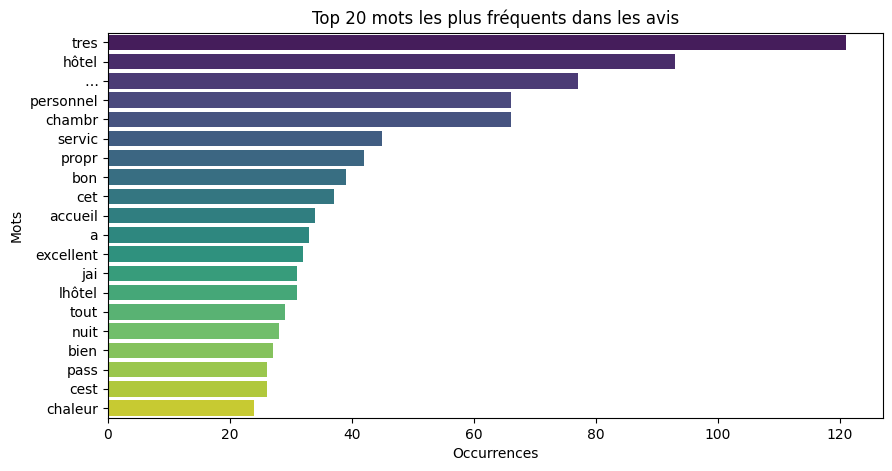

In [23]:
# Barplot des 20 mots les plus fréquents
words, counts = zip(*most_common)
plt.figure(figsize=(10,5))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.title("Top 20 mots les plus fréquents dans les avis")
plt.xlabel("Occurrences")
plt.ylabel("Mots")
plt.show()

In [24]:
# Sauvegarde des matrices pour ML
scipy.sparse.save_npz('X_bow.npz', X_bow)
scipy.sparse.save_npz('X_tfidf.npz', X_tfidf)
print("Matrices BOW et TF-IDF sauvegardées.")

Matrices BOW et TF-IDF sauvegardées.


visualise la longueur des avis et les mots fréquents → super pour EDA.

Sauvegarde les matrices → utile pour ML, ne pas recalculer à chaque fois.

Ne pas jeter, juste être sûr d’utiliser eval() uniquement si les données sont sous forme de liste-string depuis CSV.

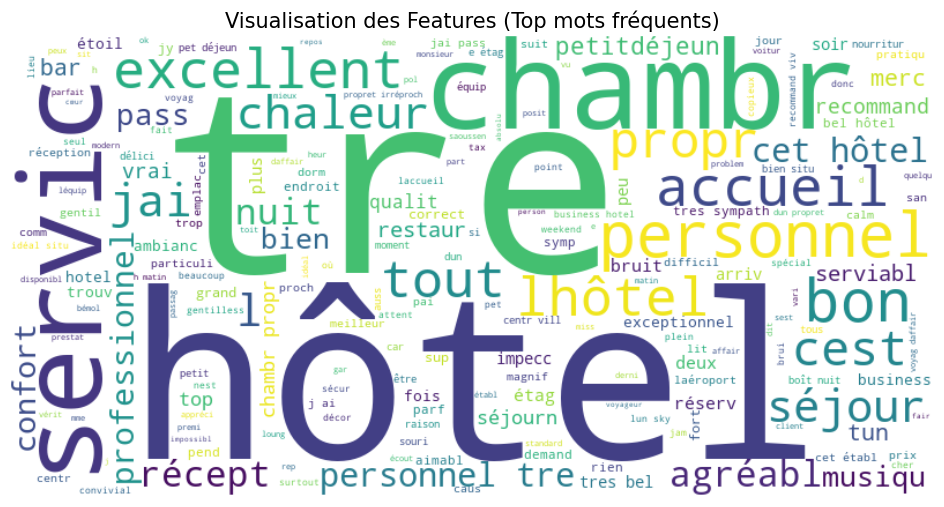

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
df=pd.read_csv('cleaned_hotel_reviews.csv')

# 1. Préparation du texte : On rassemble tous les avis en une seule grande chaîne
# Cette ligne gère si vos données sont des listes de mots ou déjà du texte
text_combined = " ".join(df['processed_text'].apply(lambda x: " ".join(x) if isinstance(x, list) else str(x).replace("'", "").replace("[", "").replace("]", "").replace(",", "")))

# 2. Génération du Nuage de Mots
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=200).generate(text_combined)

# 3. Affichage
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # On enlève les axes moches
plt.title("Visualisation des Features (Top mots fréquents)", fontsize=15)
plt.show()